**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Germán Eduardo Rodríguez Vázquez
*   MATRÍCULA: A01796325


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [63]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analitica de Datos/Actividad 2/LaqnData.csv'
air_df = pd.read_csv(file_path)


In [64]:
air_df.shape

(43800, 6)

In [65]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [66]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [67]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [68]:
air_df.dtypes

,0
Site,object
Species,object
ReadingDateTime,object
Value,float64
Units,object
Provisional or Ratified,object


In [69]:
air_df.isna().sum()

,0
Site,0
Species,0
ReadingDateTime,0
Value,3230
Units,0
Provisional or Ratified,0


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [70]:
print("¿Cuántas mediciones se hicieron?")
air_df.shape[0]

¿Cuántas mediciones se hicieron?


43800

In [71]:
print("¿Cuántos contaminantes del aire (Species) se analizaron?")
air_df['Species'].nunique()

¿Cuántos contaminantes del aire (Species) se analizaron?


5

In [72]:
print("¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.")
constant_columns = [col for col in air_df.columns if air_df[col].nunique() == 1]
constant_columns

¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.


['Site', 'Provisional or Ratified']

In [73]:
air_df = air_df.drop(columns=constant_columns)

In [74]:
print("La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe.")
air_df['Units'].unique()

La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe.


array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [75]:
air_df = air_df.drop(columns=['Units'])

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [76]:
species_counts = air_df['Species'].value_counts()
species_counts

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


In [77]:
print("Suma total de mediciones:", species_counts.sum())
print(f"Total de mediciones: {air_df.shape[0]}")

Suma total de mediciones: 43800
Total de mediciones: 43800


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [78]:
air_df.groupby('Species')['Value'].mean()

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [79]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df.head()

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [80]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [81]:
# Mayor valor de NO2 y el día correspondiente
max_NO2 = pvt_df['NO2'].idxmax(), pvt_df['NO2'].max()
print(f"Mayor valor de NO2: {max_NO2}")

# Menor valor de PM10 y el día correspondiente
min_PM10 = pvt_df['PM10'].idxmin(), pvt_df['PM10'].min()
print(f"Menor valor de PM10: {min_PM10}")

# Mediana del NO
no_median = pvt_df['NO'].median()
print(f"La mediana del NO es {no_median}")

# Primer cuartil de PM2.5
pm25_q1 = pvt_df['PM2.5'].quantile(0.25)
print(f"El primer cuartil de PM2.5 es {pm25_q1}")

Mayor valor de NO2: ('24/01/2017 19:00', 120.2)
Menor valor de PM10: ('12/09/2017 23:00', -5.6)
La mediana del NO es 7.1
El primer cuartil de PM2.5 es 7.0


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

NO2 tiene mayor variabilidad.


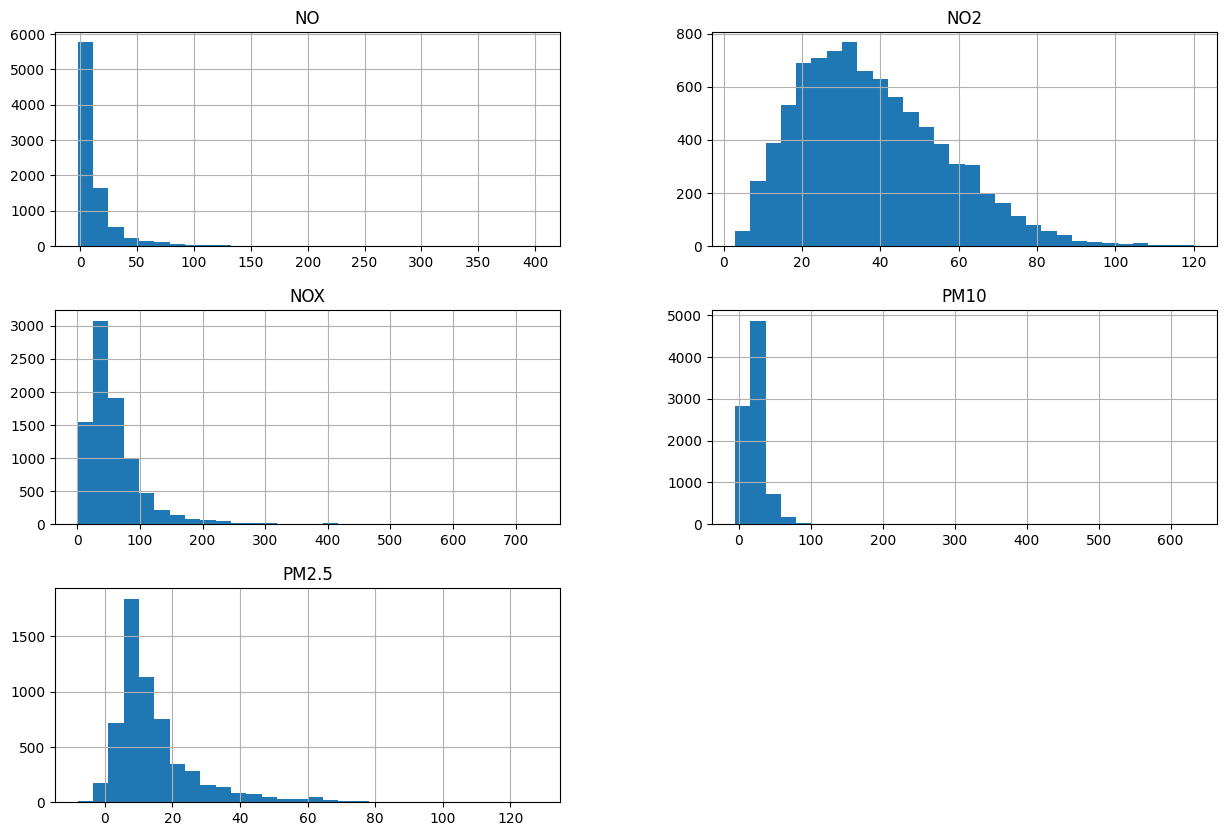

In [82]:
pvt_df.hist(bins=30, figsize=(15, 10))

print("NO2 tiene mayor variabilidad.")

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [83]:
# Dividir la columna ReadingDateTime
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df

# Dividir la columna 'Date' en día, mes y año
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df

# Unir las nuevas columnas al DataFrame original y eliminar 'ReadingDateTime' y 'Year'
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])

# Establecer un nuevo índice
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [84]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

* melt() y pivot() transforman los datos entre formato largo y ancho.

* stack() y unstack() realizan operaciones similares, pero en dimensiones jerárquicas (índices múltiples).

Para elegir un equivalente a melt(), la opción sería stack() porque comprime los datos de columnas a filas, similar a lo que hace melt().